## K-cores

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import collections

Let's compute and visualize k-cores in a small random graph. 

In [2]:
# First lets create a test graph with 20 nodes
# we can use fast_gnp_random_graph function in networkx which creates a Erdős-Rényi graph. 
seed = 11
random_graph = nx.fast_gnp_random_graph(50, 0.2, seed, directed=False)

In [3]:
# We can get core number of each vertex.
# The core number of a node is the largest value k of a k-core containing that node.
core_numbers = nx.core_number(random_graph)

In [4]:
# Count core numbers
counter = collections.Counter(list(core_numbers.values()))
counter

Counter({7: 37, 5: 1, 6: 12})

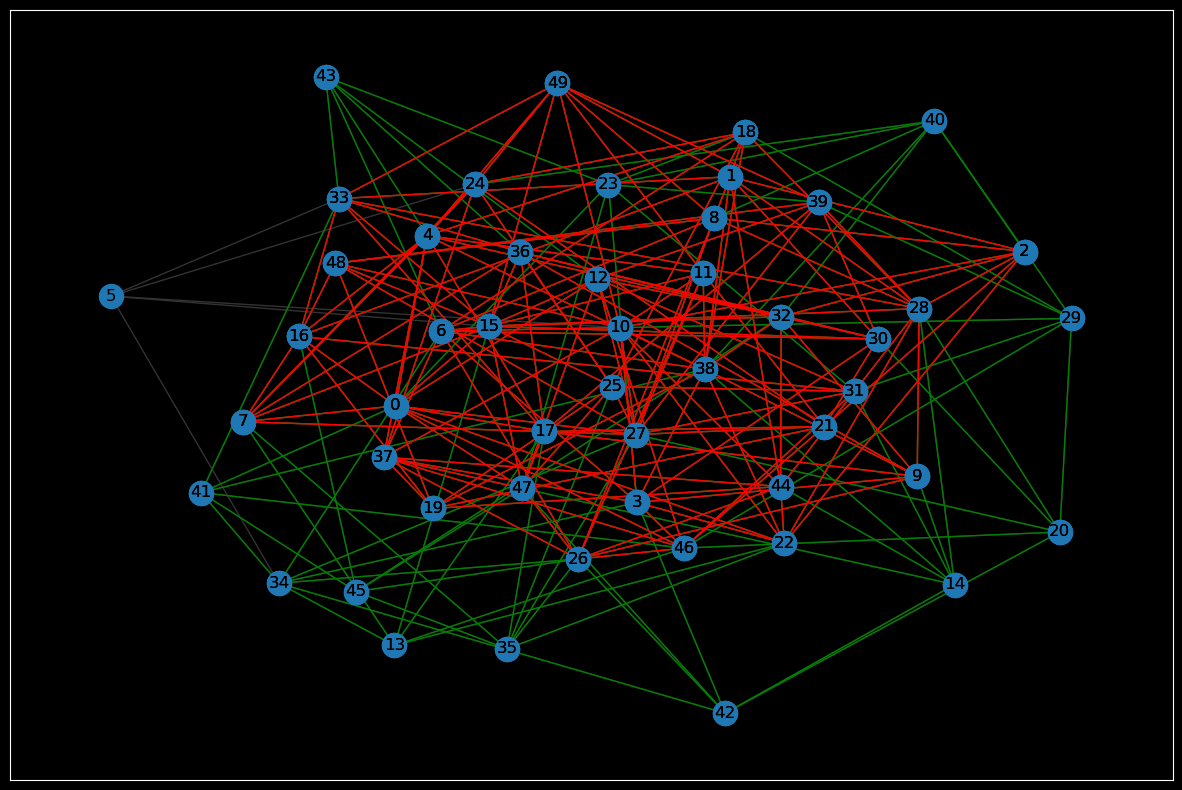

In [7]:
G_core_6 = nx.k_core(random_graph, 6)
G_core_7 = nx.k_core(random_graph, 7)
plt.rcParams.update({'figure.figsize': (15, 10)})
plt.style.use('dark_background')
pos = nx.spring_layout(random_graph, k=0.1)
nx.draw_networkx(
    random_graph, pos=pos, edge_color="#333333")
nx.draw_networkx(
    G_core_6, pos=pos, edge_color="green")
nx.draw_networkx(
    G_core_7, pos=pos, edge_color="red")


#### Simulating networks 

In [8]:
def get_core_size(n, p, directed, n_sim):
    
    """
    A function to calculate the core sizes of desired random graph in a simulation of n rounds. 
        Inputs:
            n: integer. number of nodes in the desired random graph.
            p: float. Probability for edge creation.
            directed: boolean. Indicate directed graph or not.
            n_sim: number of similation runs.
            
        Output: dictionary. Consist of a list of core sizes of each random graph created,
        a list of degenarcy of each random graph created and a list of k-core of each random graph created.
        
    """
    
    n_sim_core_sizes = []
    degeneracies = []
    den_core_size = []
    
    for sim in range(n_sim):
        
        # create a random graph
        random_graph = nx.fast_gnp_random_graph(n, p, directed=directed)
        
        # get core numbers
        core_numbers = nx.core_number(random_graph)
    
        # Count core numbers
        counter = collections.Counter(list(core_numbers.values()))
    
        core_sizes = []
        for k in range(max(counter.keys())):
            
            if k == 0:
                core_size = n
            elif k in counter.keys() and k > 0:
                core_size = core_size - counter[k]
                
            core_sizes.append(core_size)
            
        n_sim_core_sizes.append(core_sizes)
        degeneracies.append(max(counter.keys()))
        den_core_size.append(core_sizes[-1])
        
    
    return {"core_sizes": n_sim_core_sizes, "degeneracies": degeneracies, "degeneracy_core_size": den_core_size}
    
    
    

In [9]:
# Simulate random graphs and get core sizes.
simulation = get_core_size(n=1000, p=0.01, directed=False, n_sim = 10)

In [10]:
# Check each graphs core sizes.
simulation["core_sizes"]

[[1000, 1000, 998, 989, 963, 901, 737],
 [1000, 1000, 998, 996, 972, 911, 729],
 [1000, 1000, 998, 991, 966, 897, 741],
 [1000, 1000, 999, 992, 971, 901, 705],
 [1000, 1000, 999, 992, 961, 914, 726],
 [1000, 999, 997, 991, 970, 929, 810],
 [1000, 999, 997, 994, 980, 943, 825],
 [1000, 999, 996, 988, 968, 910, 761],
 [1000, 1000, 995, 991, 970, 912],
 [1000, 999, 998, 989, 963, 905]]

In [11]:
# Check highest core size.
simulation["degeneracy_core_size"]

[737, 729, 741, 705, 726, 810, 825, 761, 912, 905]

In [12]:
# Check each degenaracy.
simulation["degeneracies"]

[7, 7, 7, 7, 7, 7, 7, 7, 6, 6]

The largest value of k such that the k-core is non-empty is called the **degeneracy**.

For a network of 1000 nodes, degeneracy is pretty stable across simulations.

#### How does degeneracy vary with network size?

In [13]:
Ns = range(1000,20000,1000)

In [14]:
from statistics import mean

simulations = []
counter = 0
for n in Ns:
    sim = get_core_size(n=n, p=0.01, directed=False, n_sim = 10)
    degen = mean(sim["degeneracies"])
    print(degen)
    simulations.append(degen)
    counter += 1

7
14
21.3
29.8
38
46
54.5
63
71.8
80.5
89.1
98
106.8
115.8
124.6
133.1
142.2
151.2
160.3


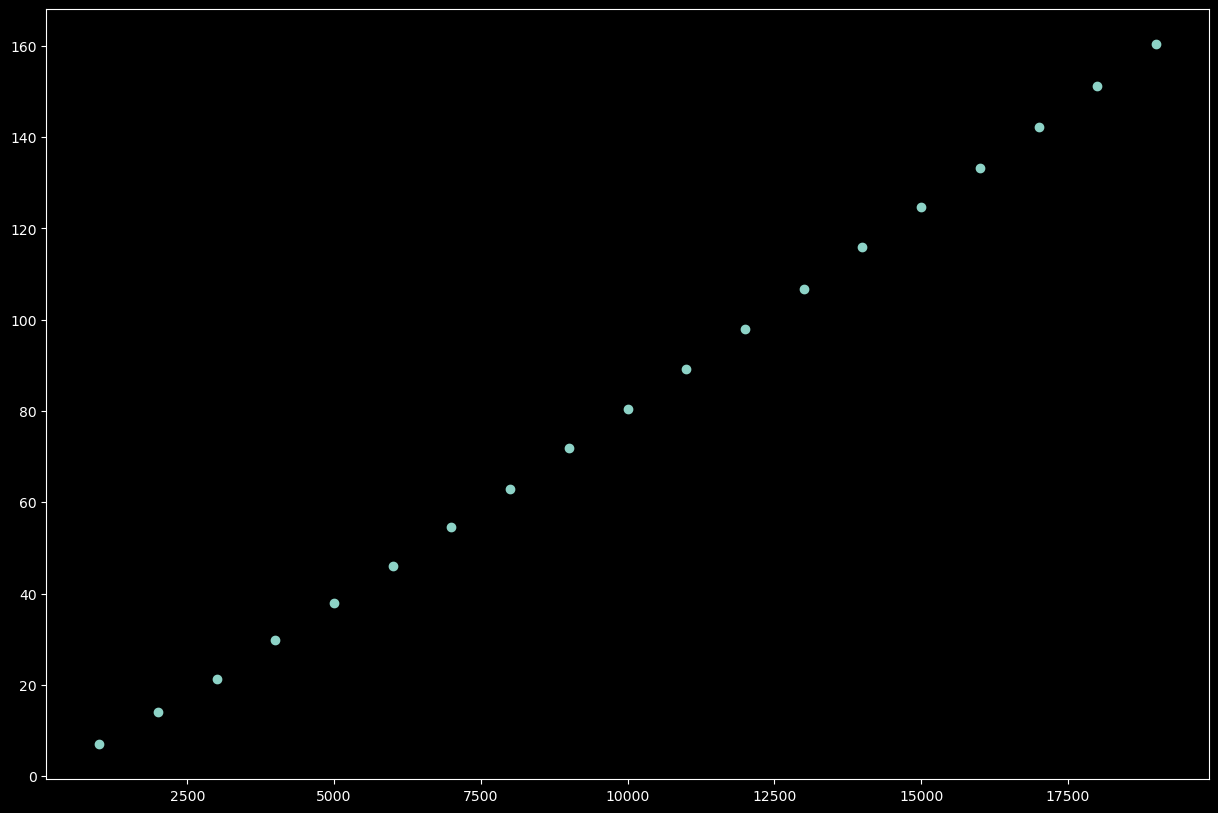

In [15]:
plt.scatter(Ns, simulations)